In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

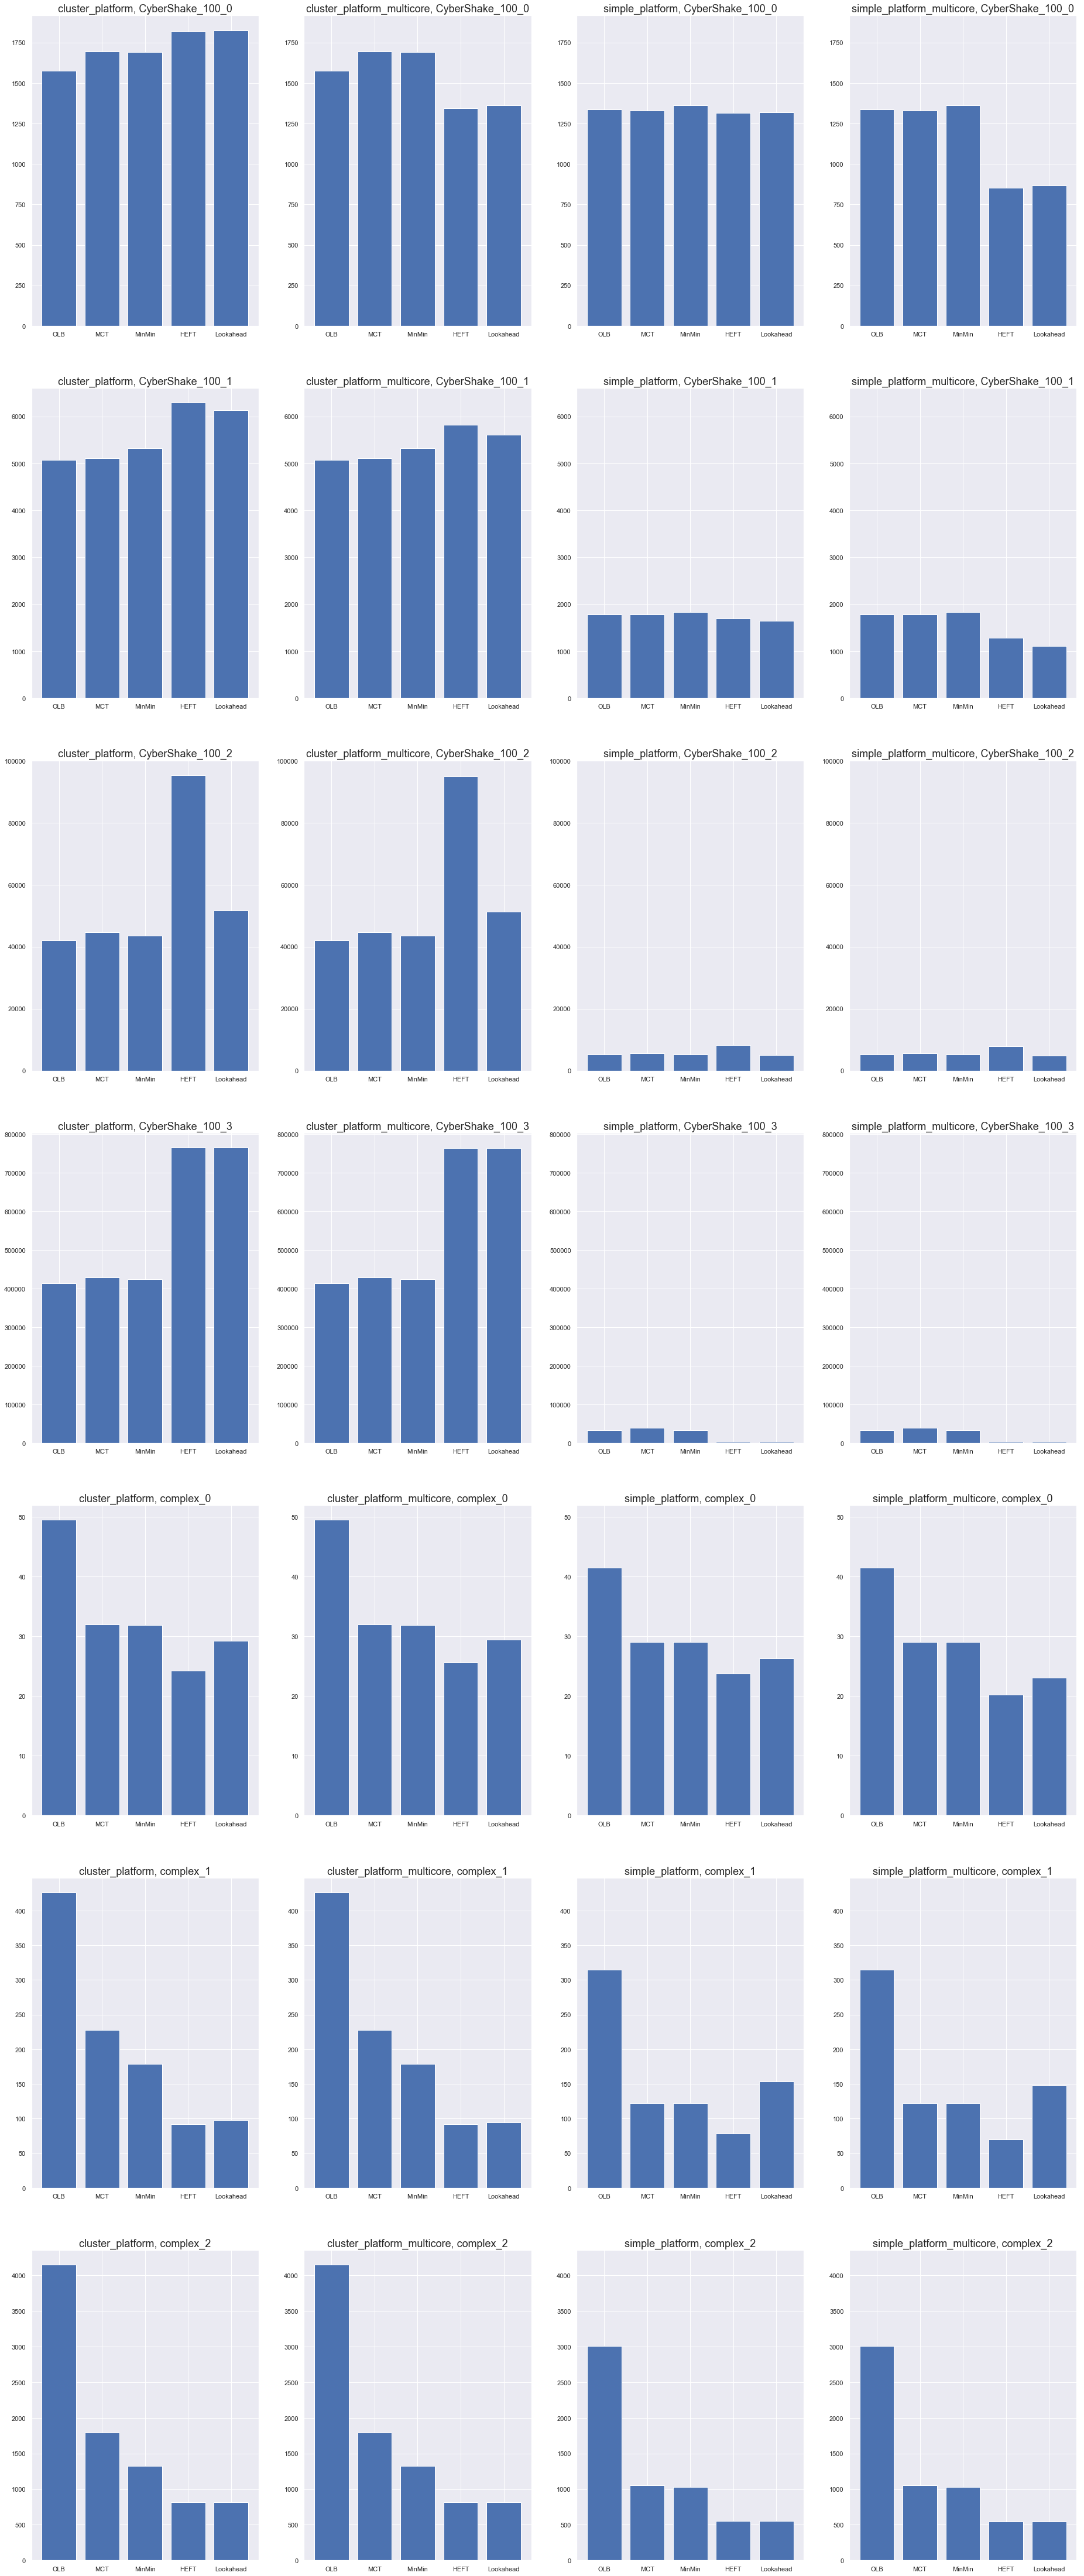

In [5]:
import json
results = json.load(open('output'))
by_platform_and_worflow = {}
for r in results:
    if 'simple_' in r['tasks']:
        continue
    by_platform_and_worflow.setdefault(r['tasks'], {})
    by_platform_and_worflow[r['tasks']].setdefault(r['platform'], [])
    by_platform_and_worflow[r['tasks']][r['platform']].append(r)

plt.figure(figsize=(32, 80))
counter = 1
for i, (workflow, workflow_results) in enumerate(sorted(by_platform_and_worflow.items())):
    max_res = 0
    for platform_results in workflow_results.values():
         max_res = max(max_res, max([x['makespan'] for x in platform_results]))
        
    
    for j, (platform, platform_results) in enumerate(sorted(workflow_results.items())):
        plt.subplot(len(by_platform_and_worflow), len(workflow_results), counter)
        plt.ylim(top=max_res*1.05)
        algo = [x['algorithm']['name'] for x in platform_results]
        result = [x['makespan'] for x in platform_results]
        plt.xticks(range(len(algo)), algo)
        plt.bar(range(len(algo)), result)
        platform = platform.split("/")[-1].rsplit('.', 1)[0]
        workflow = workflow.split("/")[-1].rsplit('.', 1)[0]
        plt.title(f'{platform}, {workflow}', fontsize=18)
        counter += 1
plt.savefig('charts.png')